In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from RNN_model import SimpleRNN
from lstm_models import LSTM
import utils_2 as ut2
from traindata import trainData



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data as data_utils


np.random.seed(seed=77)
torch.manual_seed(77)

c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Amplitude')
train, val, test = data.split_data('Amplitude')

## **scaler**

In [3]:
# sub sampleo

train = utils.subsample(train, 2)
val = utils.subsample(val, 2)
test = utils.subsample(test, 2)

In [4]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
val_scaled = scaler.transform(val.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

In [5]:
x_train, y_train = ut2.create_sequences(train_scaled[:10000], 1000, 1)
x_val, y_val = ut2.create_sequences(val_scaled[:5000], 1000, 1)
x_test, y_test = ut2.create_sequences(test_scaled[:3000], 1000, 1)

In [6]:
'''x_train, y_train = ut2.create_sequences(train_scaled[:200000], 1000, 50)
x_val, y_val = ut2.create_sequences(val_scaled[:45000], 1000, 50)
x_test, y_test = ut2.create_sequences(test_scaled[:45000], 1000, 50)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape'''

'x_train, y_train = ut2.create_sequences(train_scaled[:200000], 1000, 50)\nx_val, y_val = ut2.create_sequences(val_scaled[:45000], 1000, 50)\nx_test, y_test = ut2.create_sequences(test_scaled[:45000], 1000, 50)\n\nx_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape'

In [7]:
x_train = torch.from_numpy(x_train.astype(np.float32)).squeeze()
y_train = torch.from_numpy(y_train.astype(np.float32)).squeeze()
x_val = torch.from_numpy(x_val.astype(np.float32)).squeeze()
y_val = torch.from_numpy(y_val.astype(np.float32)).squeeze()
x_test = torch.from_numpy(x_test.astype(np.float32)).squeeze()
y_test = torch.from_numpy(y_test.astype(np.float32)).squeeze()

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

(torch.Size([9000, 1000]),
 torch.Size([9000]),
 torch.Size([4000, 1000]),
 torch.Size([4000]),
 torch.Size([2000, 1000]),
 torch.Size([2000]))

## **Single step**

In [8]:
class MLP(nn.Module):
    '''
    Multi-layer perceptron for non-linear regression.
    '''
    def __init__(self, in_size, hid_size, out_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_size, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, out_size)
        )

    def forward(self, x):
        return(self.layers(x))

In [10]:
in_size = x_train.shape[-1]
out_size = 1
hid_size = x_train.shape[-1]//2
num_layers = 2

model = MLP(in_size, hid_size, out_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

  0%|          | 0/100 [00:00<?, ?it/s]

  4%|▍         | 4/100 [00:04<01:55,  1.21s/it]

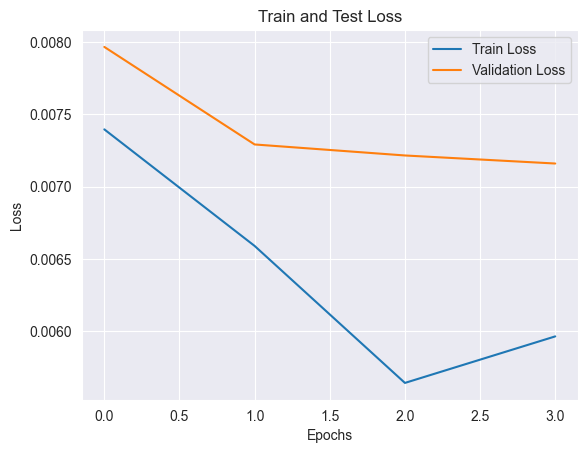

  5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Epoch :0.05    Train Loss :0.005580810364335775    Test Loss :0.0076395380310714245


  9%|▉         | 9/100 [00:11<01:51,  1.23s/it]

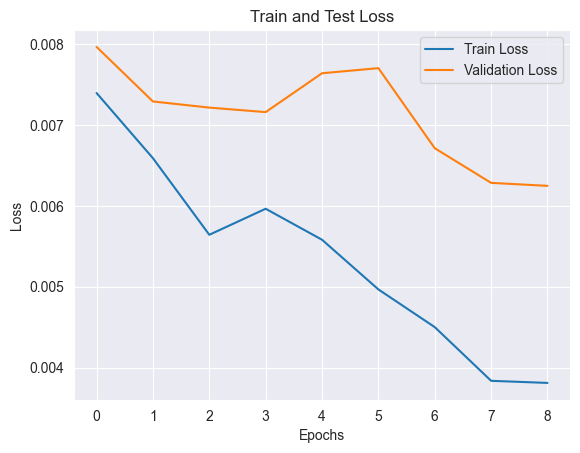

 10%|█         | 10/100 [00:13<02:02,  1.36s/it]

Epoch :0.1    Train Loss :0.0037144585512578487    Test Loss :0.006304104346781969


 12%|█▏        | 12/100 [00:15<01:54,  1.30s/it]

Early stopping at epoch:  11


 14%|█▍        | 14/100 [00:18<01:48,  1.27s/it]

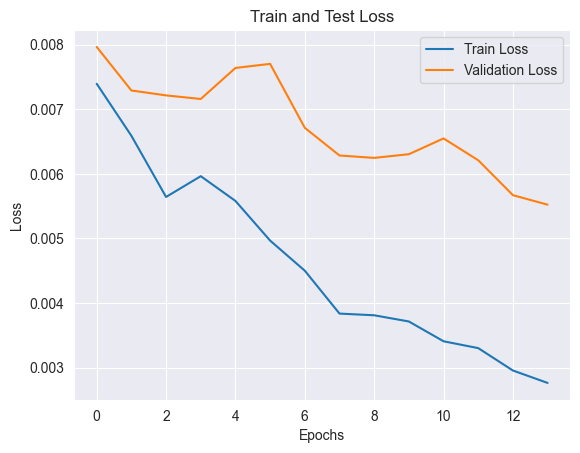

 15%|█▌        | 15/100 [00:19<01:56,  1.37s/it]

Epoch :0.15    Train Loss :0.0028040052857249975    Test Loss :0.0056165228597819805


 16%|█▌        | 16/100 [00:21<01:56,  1.39s/it]

Early stopping at epoch:  15


 17%|█▋        | 17/100 [00:22<01:50,  1.34s/it]

Early stopping at epoch:  16


 19%|█▉        | 19/100 [00:24<01:41,  1.26s/it]

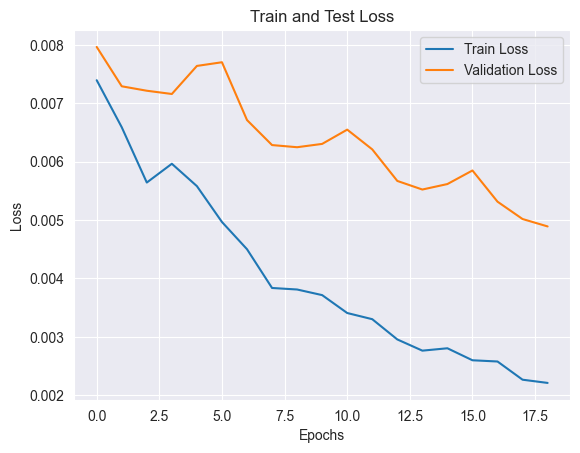

 20%|██        | 20/100 [00:26<01:50,  1.38s/it]

Epoch :0.2    Train Loss :0.0020316930022090673    Test Loss :0.004966166336089373


 21%|██        | 21/100 [00:27<01:46,  1.35s/it]

Early stopping at epoch:  20


 24%|██▍       | 24/100 [00:31<01:33,  1.23s/it]

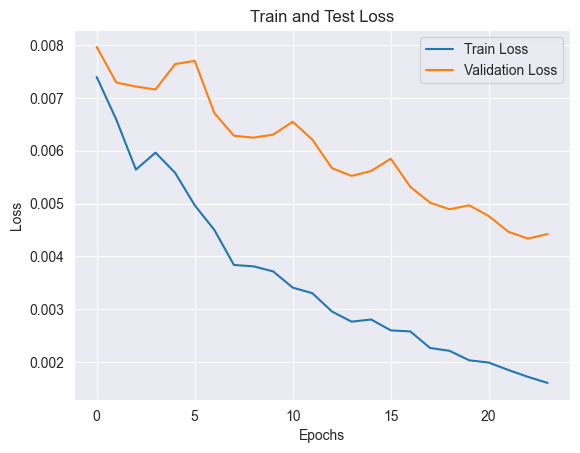

 25%|██▌       | 25/100 [00:32<01:42,  1.37s/it]

Epoch :0.25    Train Loss :0.0015518186846747994    Test Loss :0.004255973733961582
Early stopping at epoch:  24


 29%|██▉       | 29/100 [00:37<01:25,  1.21s/it]

Early stopping at epoch:  28


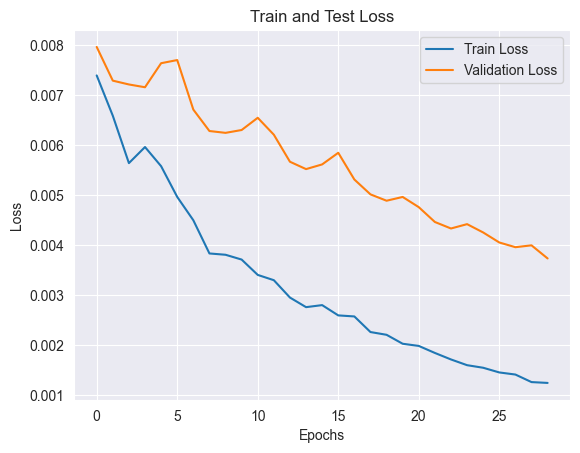

 30%|███       | 30/100 [00:39<01:32,  1.33s/it]

Epoch :0.3    Train Loss :0.0011542628053575754    Test Loss :0.0036353685427457094


 32%|███▏      | 32/100 [00:41<01:26,  1.27s/it]

Early stopping at epoch:  31


 34%|███▍      | 34/100 [00:43<01:21,  1.23s/it]

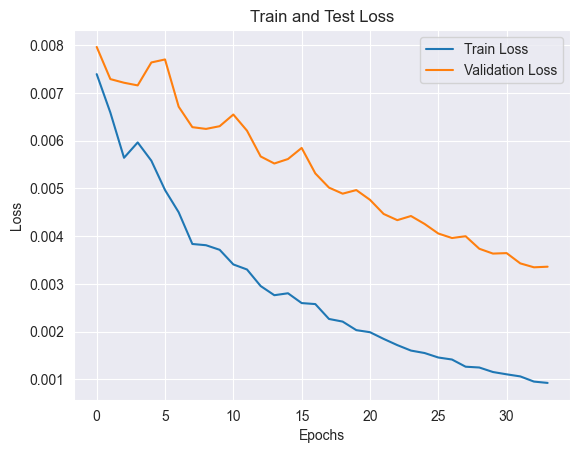

 35%|███▌      | 35/100 [00:45<01:29,  1.38s/it]

Epoch :0.35    Train Loss :0.0009160424233414233    Test Loss :0.003168939147144556
Early stopping at epoch:  34


 39%|███▉      | 39/100 [00:50<01:15,  1.25s/it]

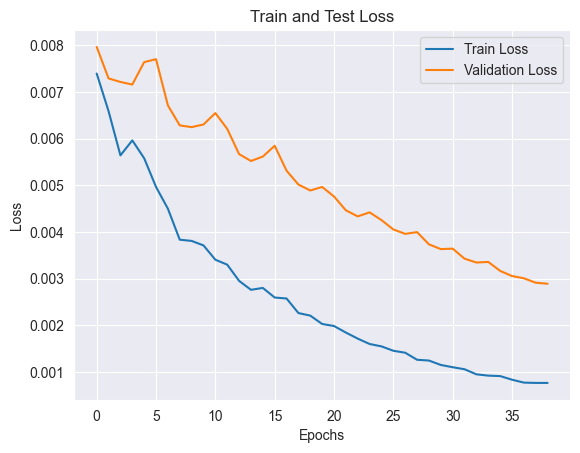

 40%|████      | 40/100 [00:52<01:22,  1.37s/it]

Epoch :0.4    Train Loss :0.0007407347438856959    Test Loss :0.0027243599761277437


 44%|████▍     | 44/100 [00:56<01:10,  1.25s/it]

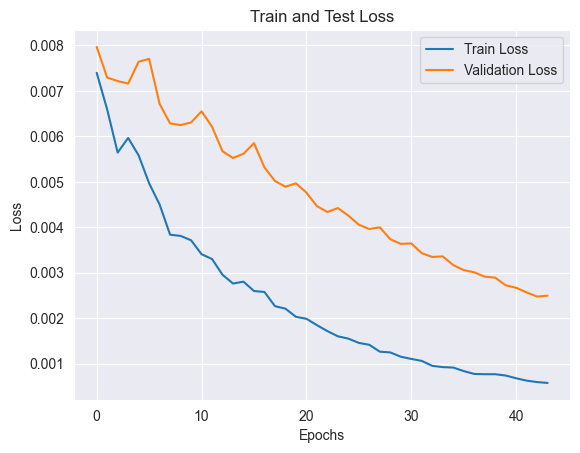

 45%|████▌     | 45/100 [00:58<01:14,  1.35s/it]

Epoch :0.45    Train Loss :0.00057614641264081    Test Loss :0.002370009431615472
Early stopping at epoch:  44


 47%|████▋     | 47/100 [01:00<01:07,  1.28s/it]

Early stopping at epoch:  46


 48%|████▊     | 48/100 [01:02<01:04,  1.24s/it]

Early stopping at epoch:  47


 49%|████▉     | 49/100 [01:03<01:02,  1.23s/it]

Early stopping at epoch:  48


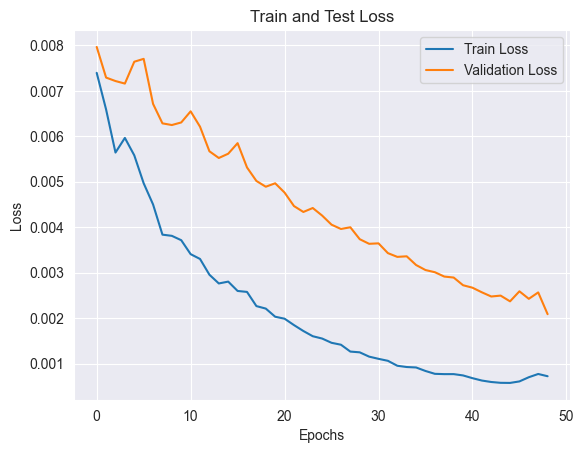

 50%|█████     | 50/100 [01:04<01:07,  1.35s/it]

Epoch :0.5    Train Loss :0.0004832839476875961    Test Loss :0.002038049977272749


 52%|█████▏    | 52/100 [01:07<01:01,  1.28s/it]

Early stopping at epoch:  51


 54%|█████▍    | 54/100 [01:09<00:57,  1.24s/it]

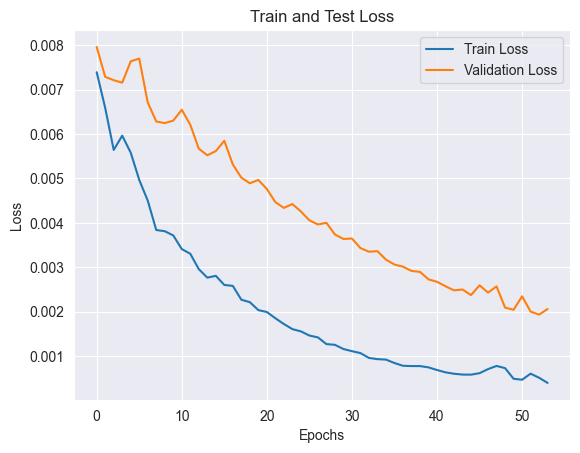

 55%|█████▌    | 55/100 [01:11<01:01,  1.37s/it]

Epoch :0.55    Train Loss :0.00045859473175369203    Test Loss :0.0018823416903614998
Early stopping at epoch:  54


 59%|█████▉    | 59/100 [01:16<00:51,  1.25s/it]

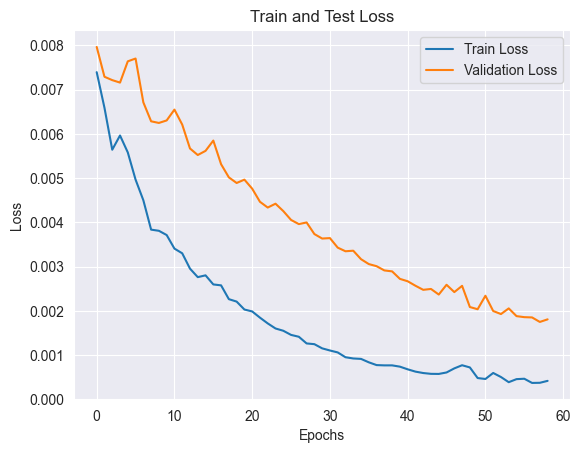

 60%|██████    | 60/100 [01:18<00:55,  1.39s/it]

Epoch :0.6    Train Loss :0.00037183210952207446    Test Loss :0.0016693465877324343
Early stopping at epoch:  59


 63%|██████▎   | 63/100 [01:21<00:47,  1.27s/it]

Early stopping at epoch:  62


 64%|██████▍   | 64/100 [01:22<00:45,  1.25s/it]

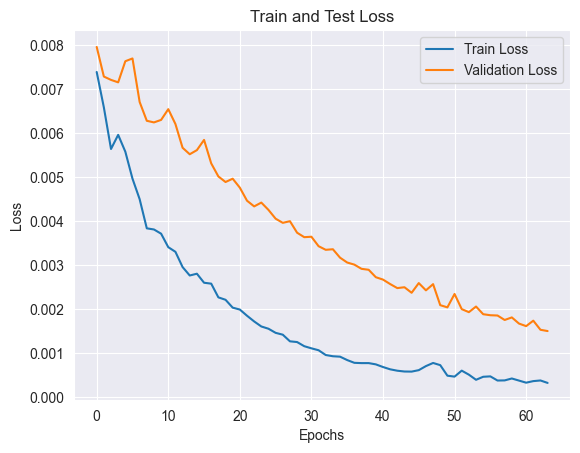

 65%|██████▌   | 65/100 [01:24<00:48,  1.39s/it]

Epoch :0.65    Train Loss :0.00029375136364251375    Test Loss :0.00156823277939111


 66%|██████▌   | 66/100 [01:25<00:45,  1.35s/it]

Early stopping at epoch:  65


 68%|██████▊   | 68/100 [01:28<00:41,  1.30s/it]

Early stopping at epoch:  67


 69%|██████▉   | 69/100 [01:29<00:39,  1.29s/it]

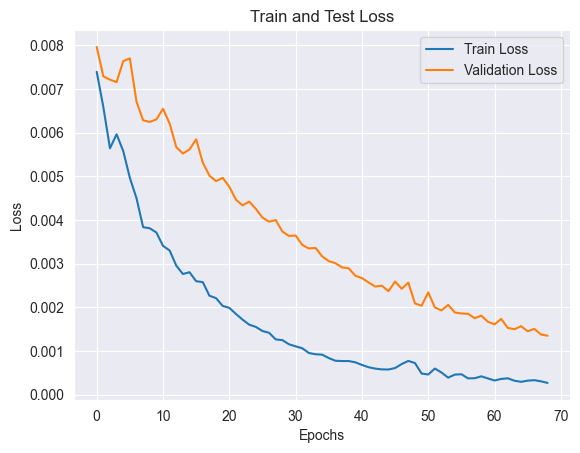

 70%|███████   | 70/100 [01:31<00:42,  1.41s/it]

Epoch :0.7    Train Loss :0.00026118967798538506    Test Loss :0.0014069722965359688


 71%|███████   | 71/100 [01:32<00:40,  1.38s/it]

Early stopping at epoch:  70


 73%|███████▎  | 73/100 [01:35<00:35,  1.32s/it]

Early stopping at epoch:  72


 74%|███████▍  | 74/100 [01:36<00:33,  1.30s/it]

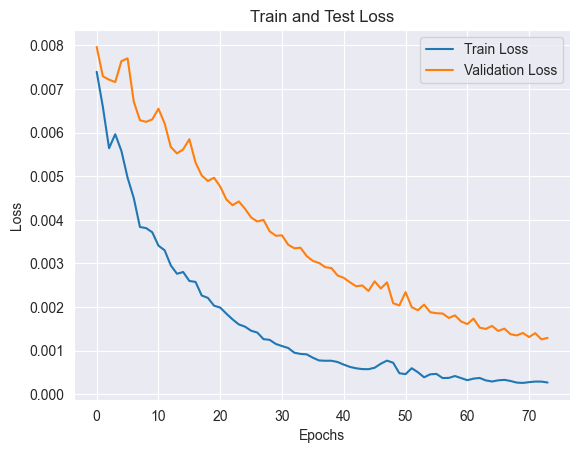

 75%|███████▌  | 75/100 [01:38<00:35,  1.44s/it]

Epoch :0.75    Train Loss :0.0002467454760335386    Test Loss :0.001209366717375815
Early stopping at epoch:  74


 78%|███████▊  | 78/100 [01:42<00:29,  1.35s/it]

Early stopping at epoch:  77


 79%|███████▉  | 79/100 [01:43<00:27,  1.31s/it]

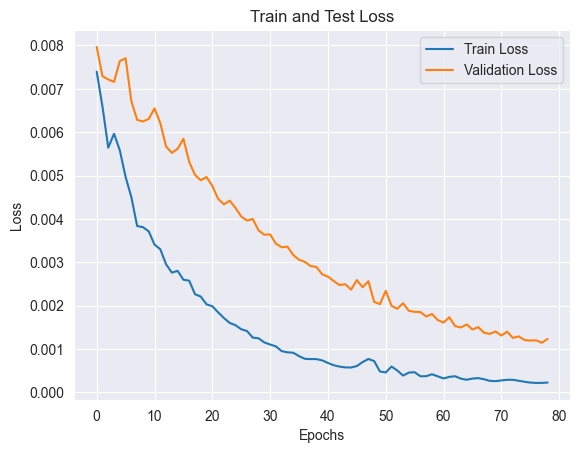

 80%|████████  | 80/100 [01:44<00:28,  1.45s/it]

Epoch :0.8    Train Loss :0.0002475481014698744    Test Loss :0.0011474175844341516
Early stopping at epoch:  79


 81%|████████  | 81/100 [01:46<00:26,  1.41s/it]

Early stopping at epoch:  80


 82%|████████▏ | 82/100 [01:47<00:24,  1.37s/it]

Early stopping at epoch:  81


 83%|████████▎ | 83/100 [01:48<00:22,  1.33s/it]

Early stopping at epoch:  82


 84%|████████▍ | 84/100 [01:50<00:20,  1.30s/it]

Early stopping at epoch:  83


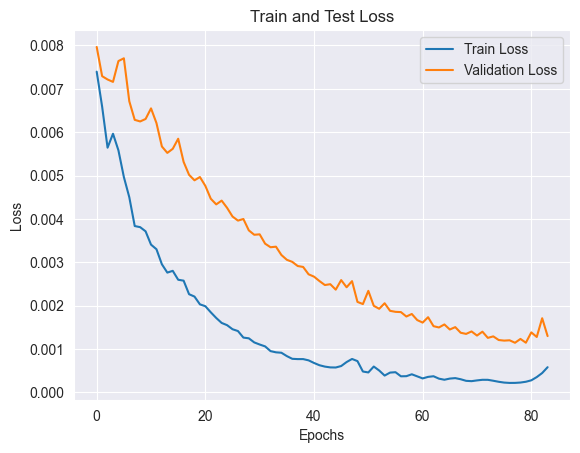

 85%|████████▌ | 85/100 [01:51<00:21,  1.42s/it]

Epoch :0.85    Train Loss :0.0004748267529066652    Test Loss :0.0012758886441588402
Early stopping at epoch:  84


 86%|████████▌ | 86/100 [01:53<00:19,  1.37s/it]

Early stopping at epoch:  85


 88%|████████▊ | 88/100 [01:55<00:15,  1.30s/it]

Early stopping at epoch:  87


 89%|████████▉ | 89/100 [01:56<00:14,  1.28s/it]

Early stopping at epoch:  88


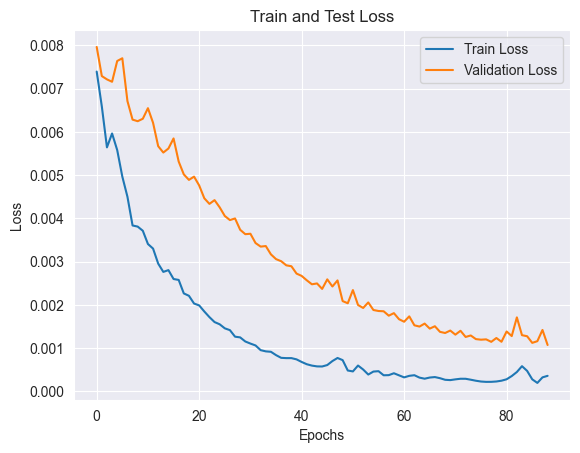

 90%|█████████ | 90/100 [01:58<00:14,  1.40s/it]

Epoch :0.9    Train Loss :0.00020362759823910892    Test Loss :0.0010772167006507516


 91%|█████████ | 91/100 [01:59<00:12,  1.34s/it]

Early stopping at epoch:  90


 92%|█████████▏| 92/100 [02:00<00:10,  1.31s/it]

Early stopping at epoch:  91


 94%|█████████▍| 94/100 [02:03<00:07,  1.29s/it]

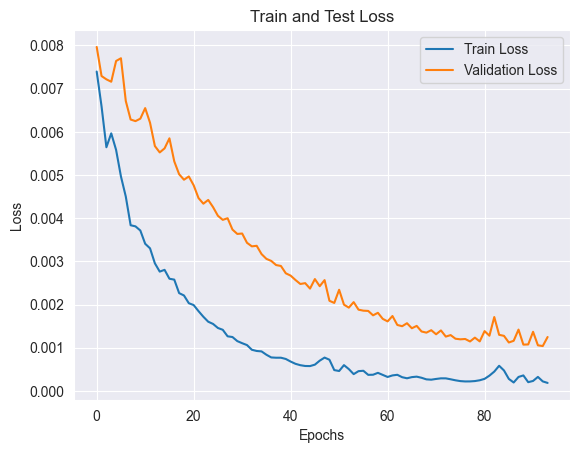

 95%|█████████▌| 95/100 [02:05<00:07,  1.41s/it]

Epoch :0.95    Train Loss :0.00026492151664569974    Test Loss :0.001039122580550611
Early stopping at epoch:  94


 98%|█████████▊| 98/100 [02:08<00:02,  1.31s/it]

Early stopping at epoch:  97


 99%|█████████▉| 99/100 [02:10<00:01,  1.30s/it]

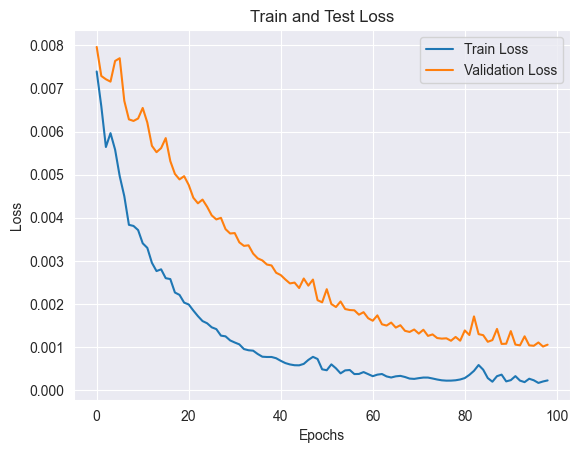

100%|██████████| 100/100 [02:11<00:00,  1.32s/it]

Epoch :1.0    Train Loss :0.00018522101163398474    Test Loss :0.0009768360760062933
Early stopping at epoch:  99


In [15]:
train_loss, test_loss = ut2.simpleTrain_model(model,
                                            criterion,
                                            optimizer,
                                            x_train,
                                            x_val,
                                            y_train,
                                            y_val,
                                            epochs=100)

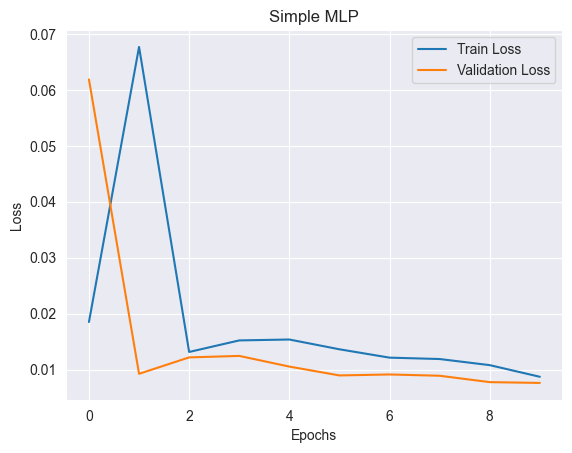

In [12]:
ut2.plot_loss(train_loss, test_loss, 'Simple MLP')

In [ ]:
val_loss = np.asanyarray(test_loss)
train_loss = np.asanyarray(train_loss)
np.savetxt("train_lossSimpleLSTM.csv", train_loss, delimiter=",")
np.savetxt("val_lossSimpleLSTM.csv", val_loss, delimiter=",")

## **test predictions**

In [16]:
test_pred = ut2.rollingWindowPrediction(model, x_test, steps = 50)

np.array(test_pred).shape

100%|██████████| 2000/2000 [01:07<00:00, 29.53it/s]


(2000, 50)

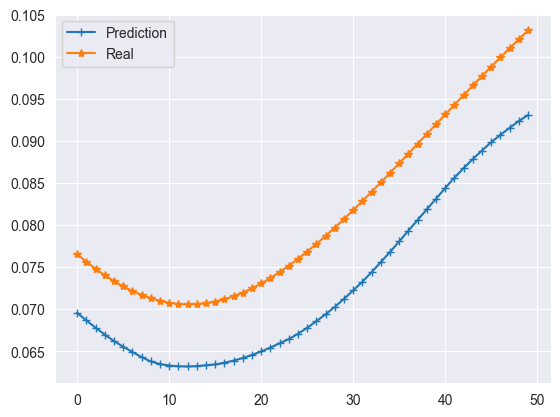

In [27]:
i = 65

plt.plot(test_pred[i],'-+', label='Prediction')
plt.plot(y_test[i:i+50].detach().numpy(), '-*',label='Real')
plt.legend()
plt.show()

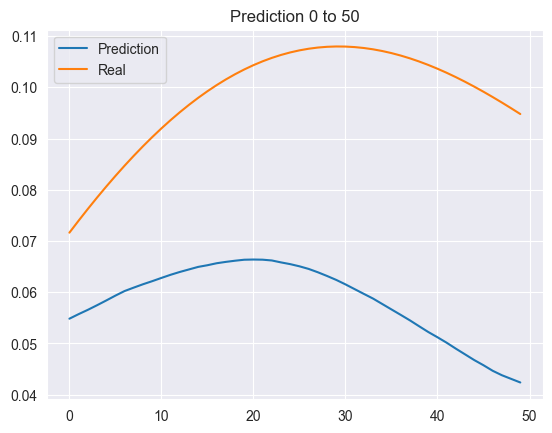

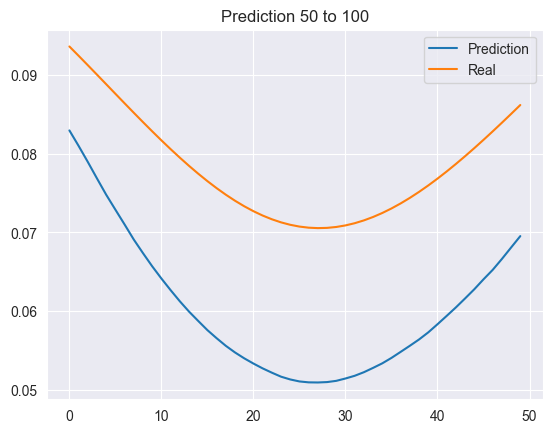

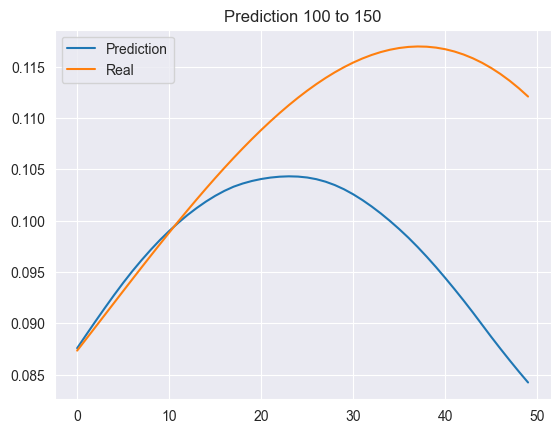

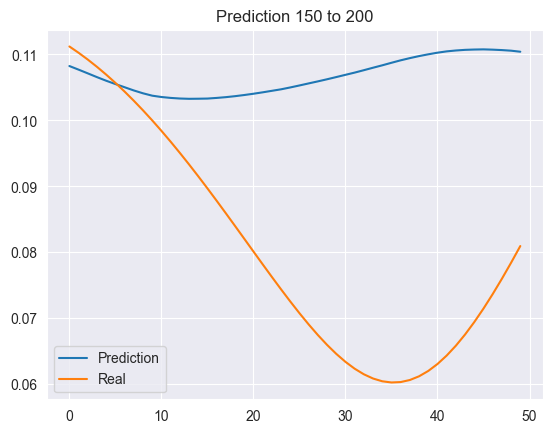

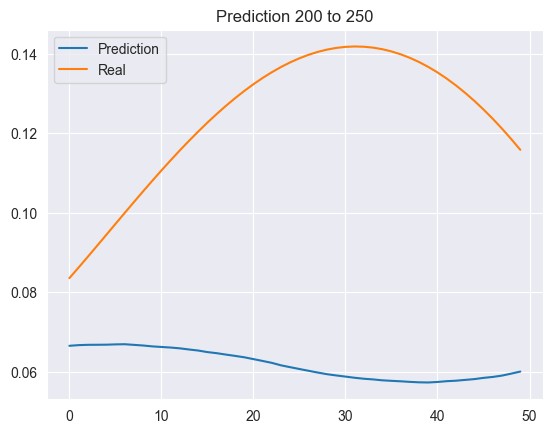

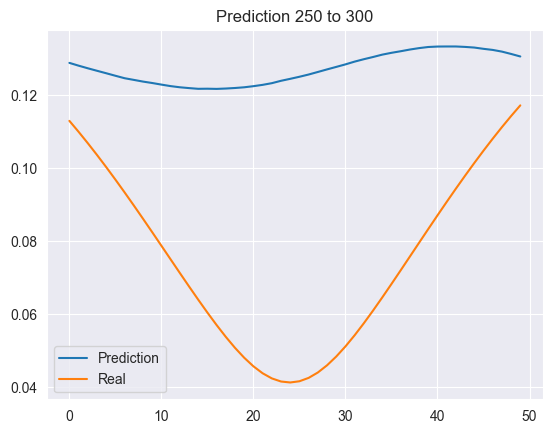

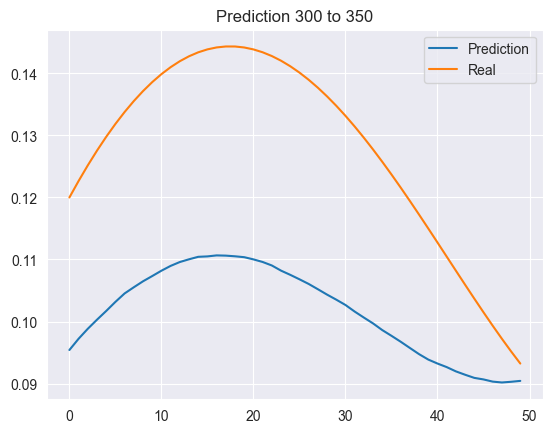

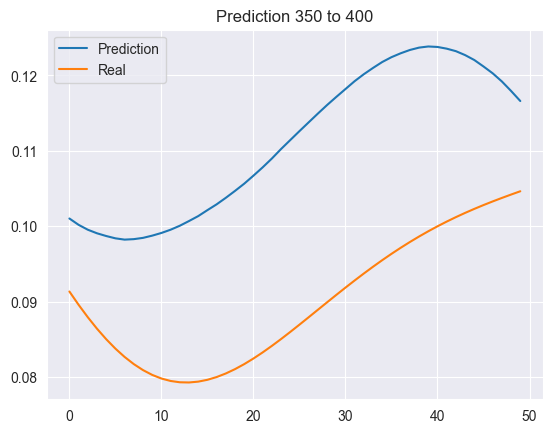

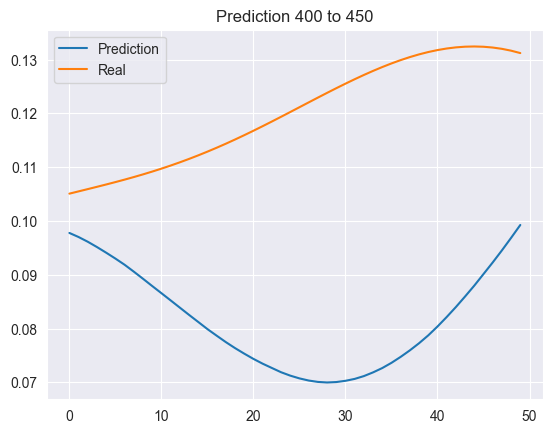

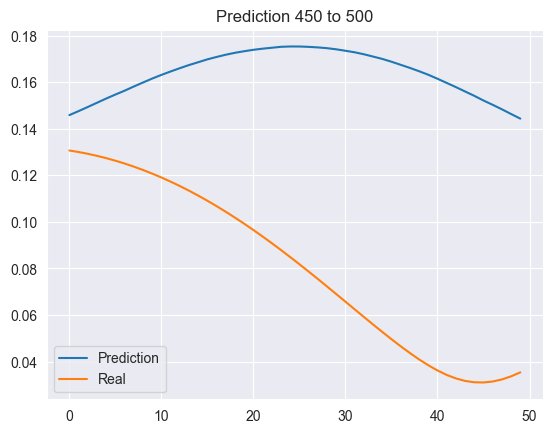

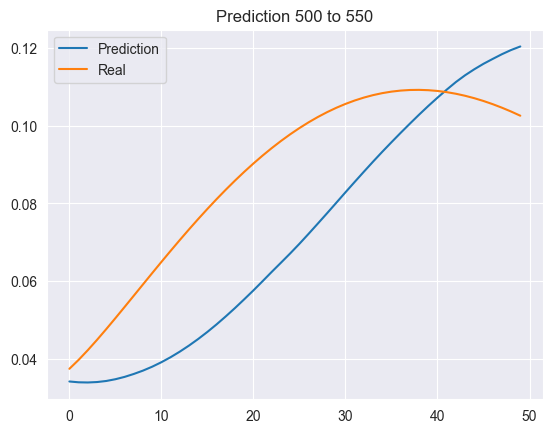

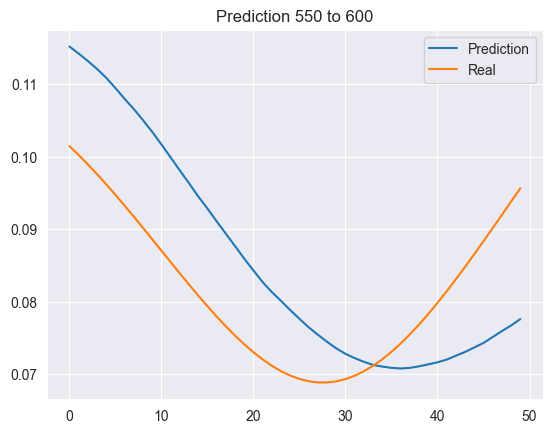

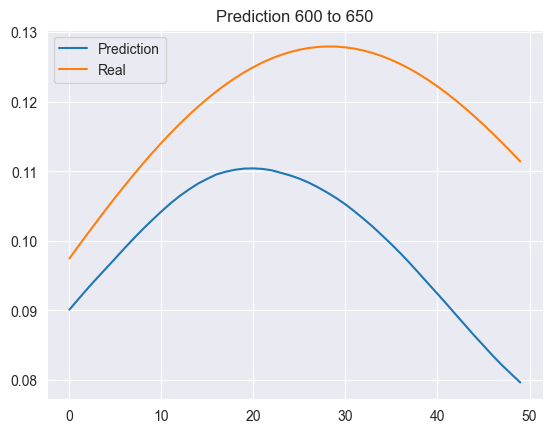

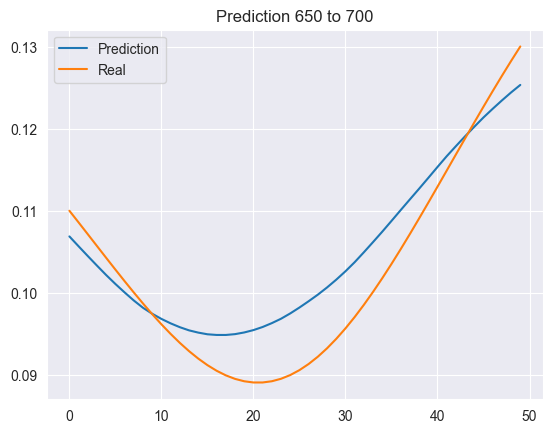

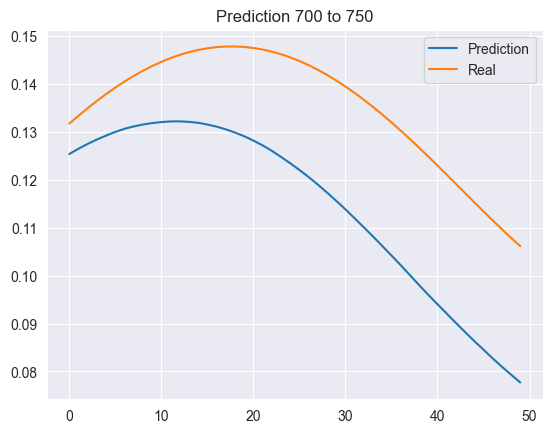

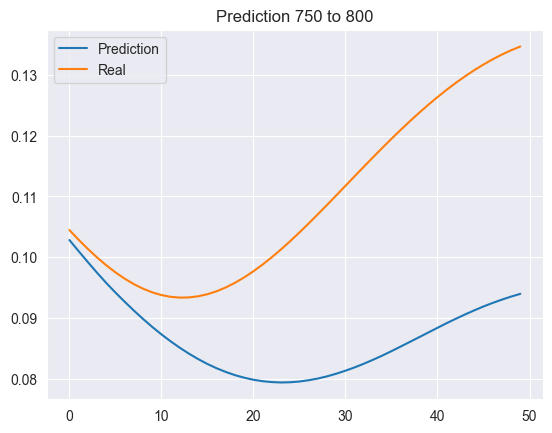

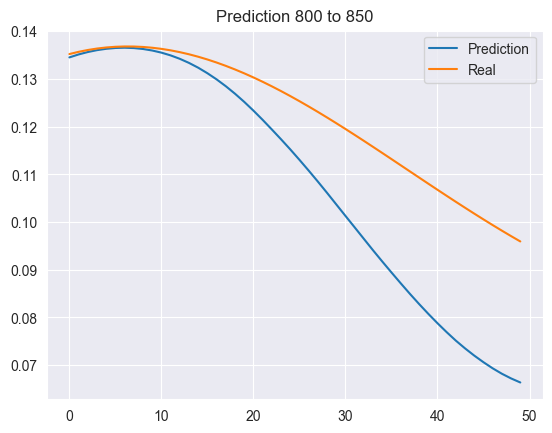

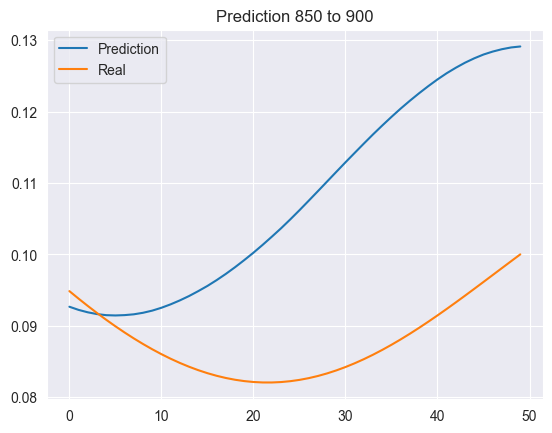

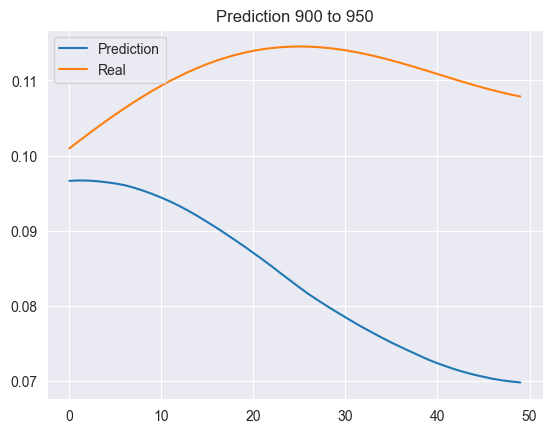

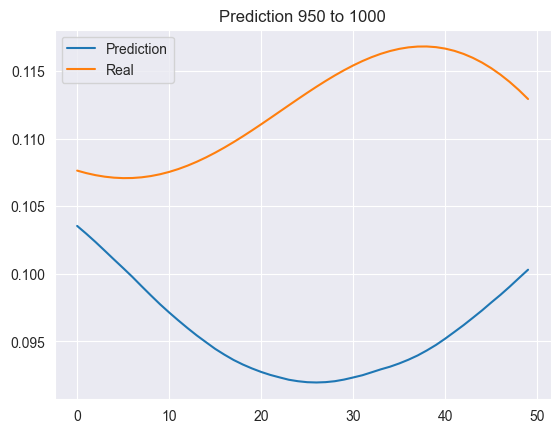

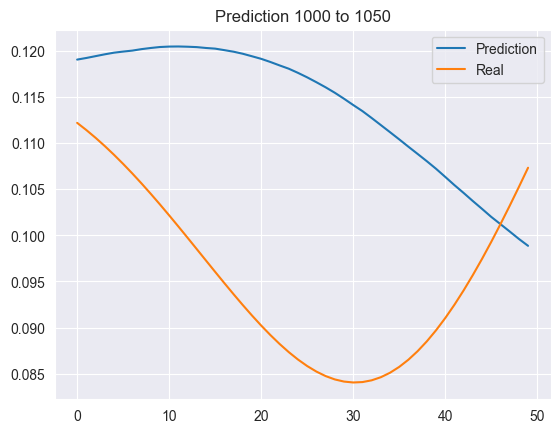

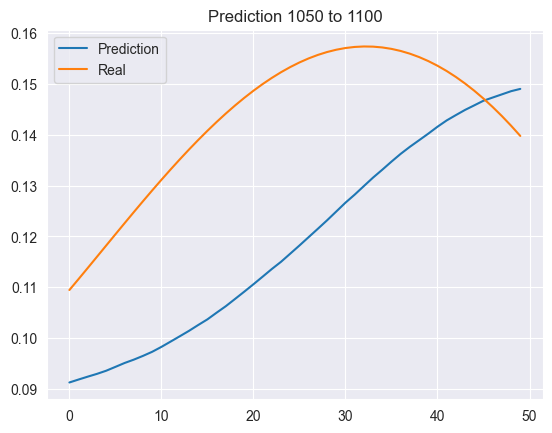

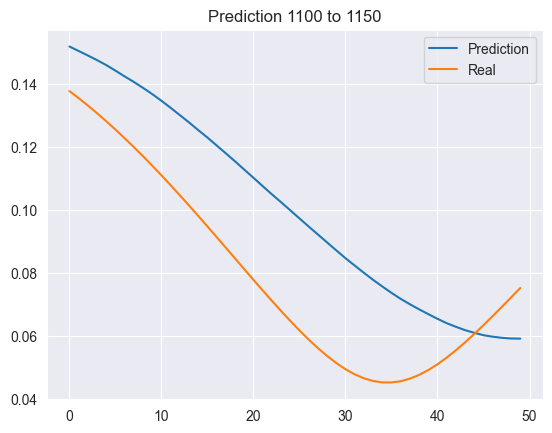

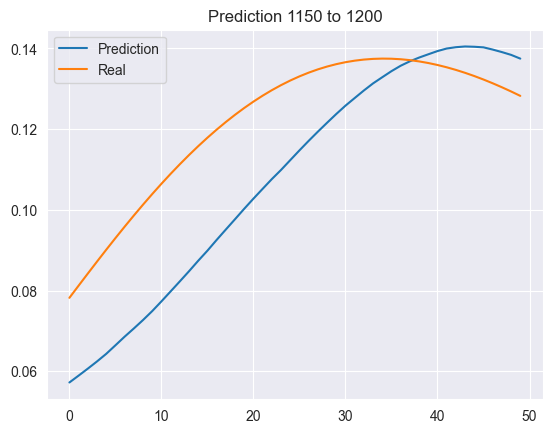

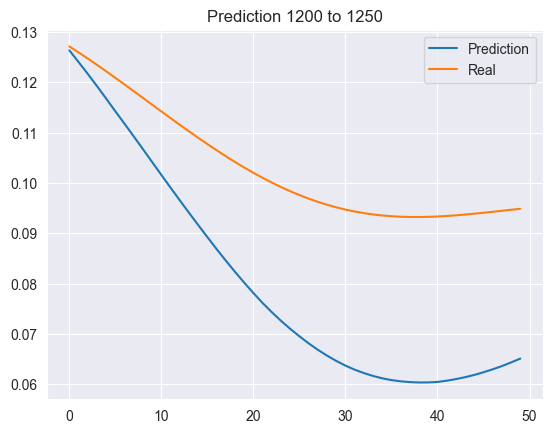

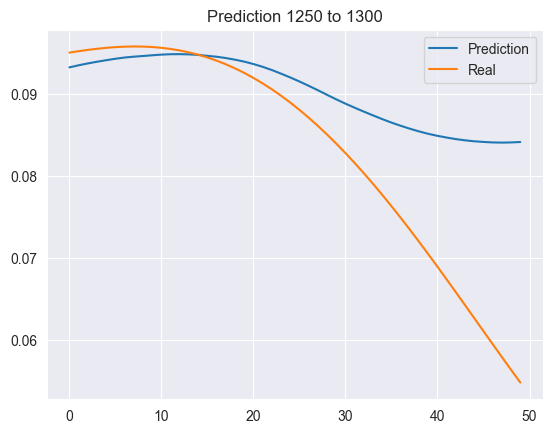

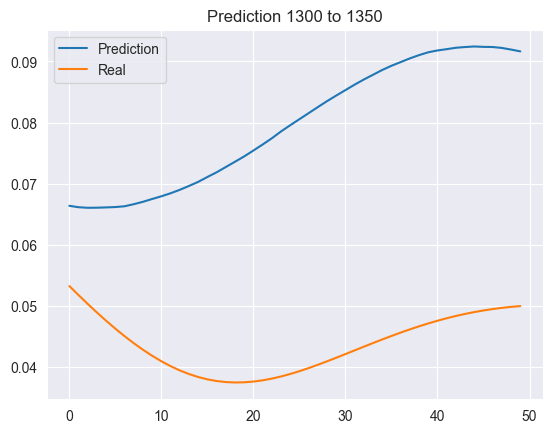

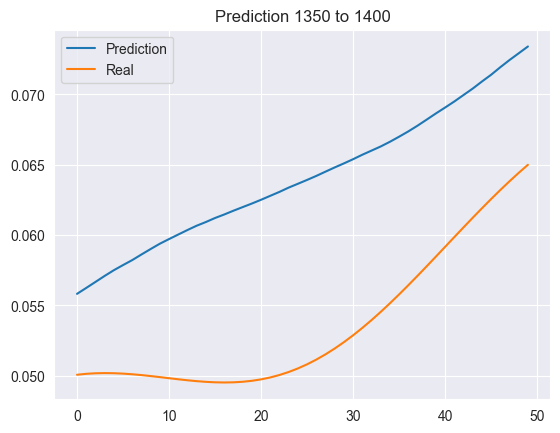

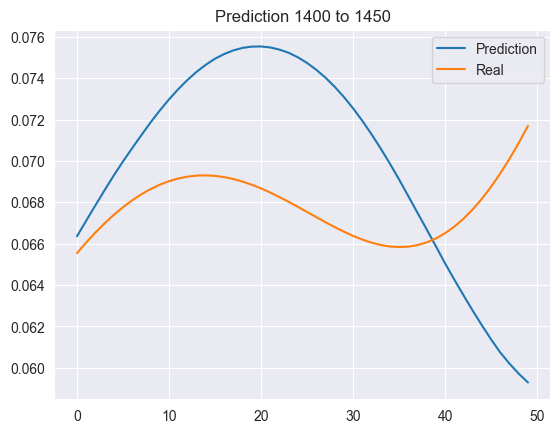

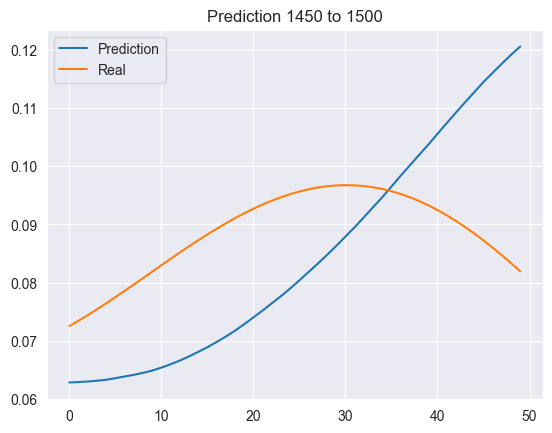

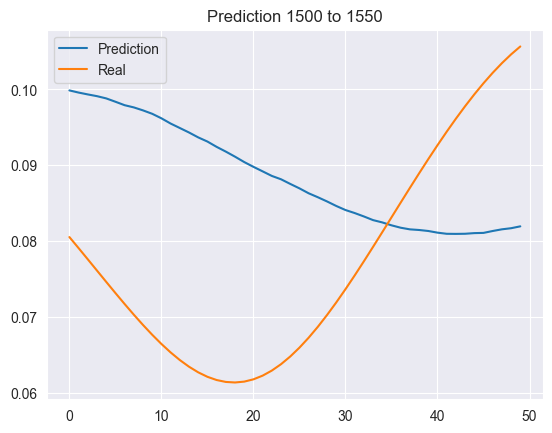

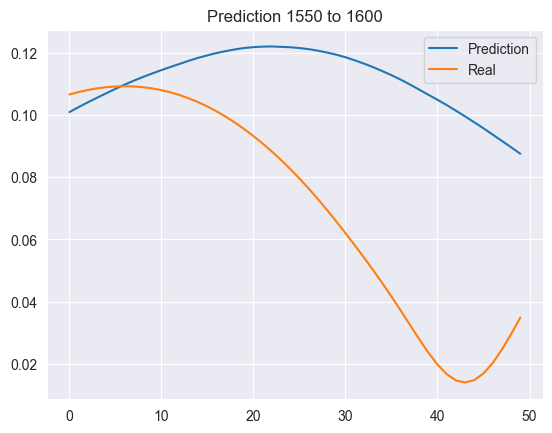

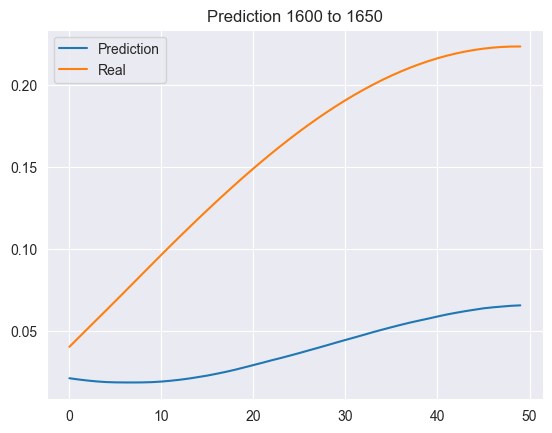

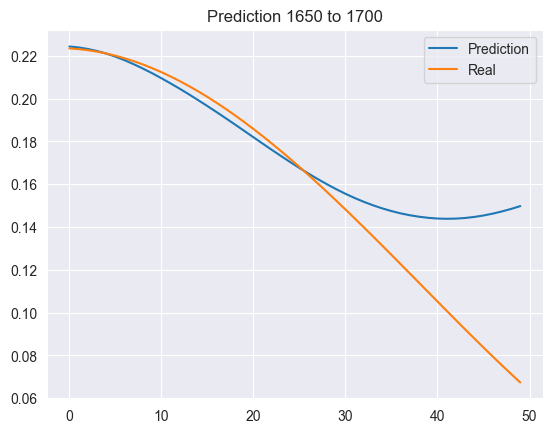

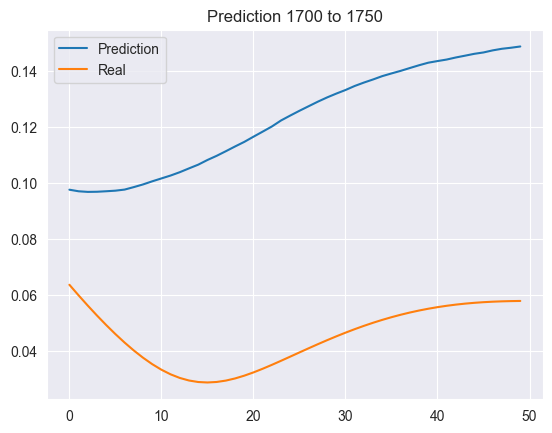

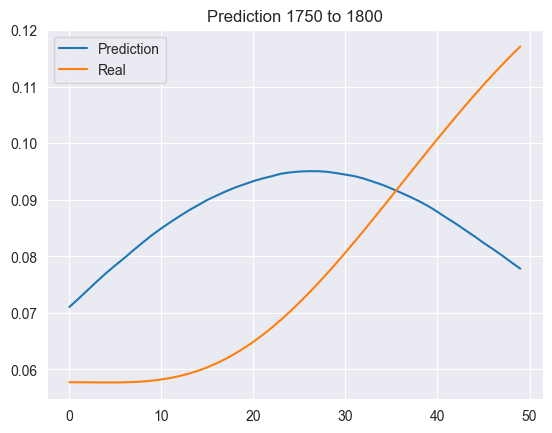

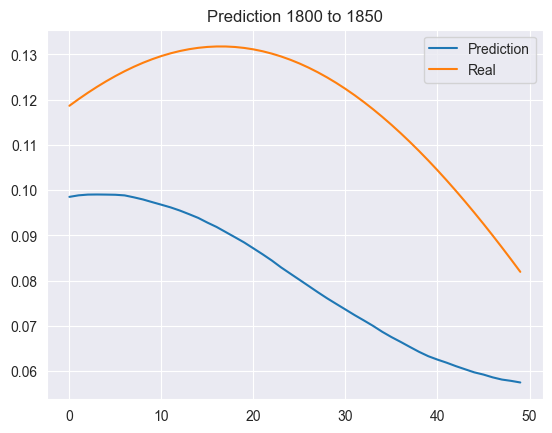

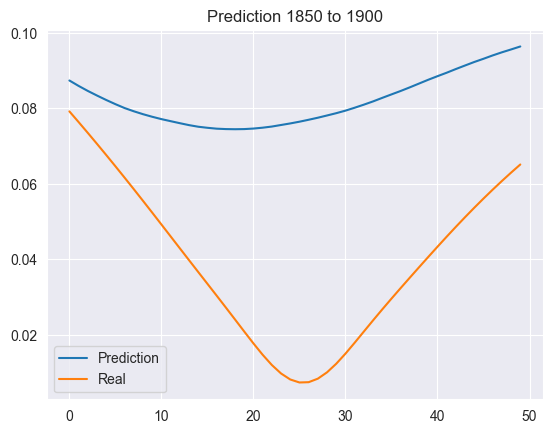

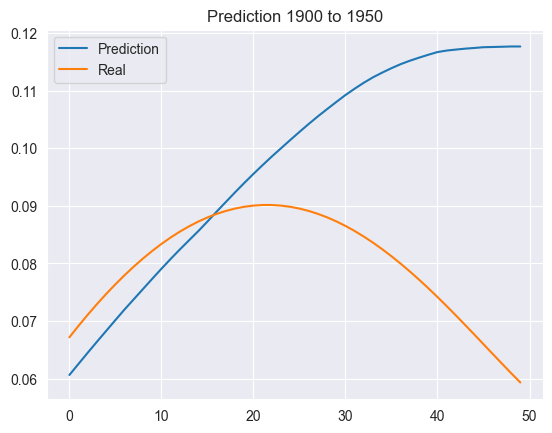

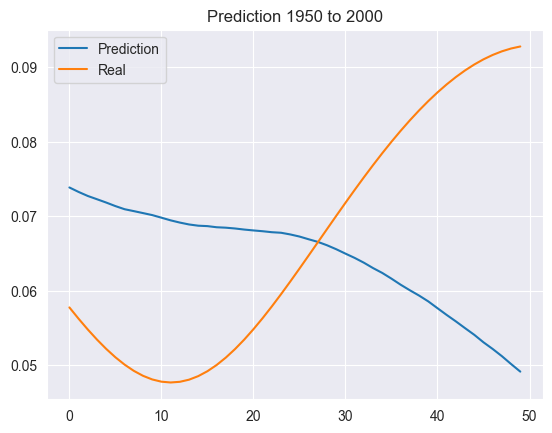

In [24]:
for i in range(0,len(test_pred), 50):
    plt.plot(test_pred[i], label='Prediction')
    plt.plot(y_test[i:i+50].detach().numpy(), label='Real')
    plt.title(f'Prediction {i} to {i+50}')
    plt.legend()
    plt.show()